In [2]:
ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18458.txt'
print('ff file path:', ff_file_path)
ff_file_path2 = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18480_2.txt'
print('ff file path2:', ff_file_path2)

ff file path: /Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18458.txt
ff file path2: /Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18480_2.txt


In [3]:
# Function to parse the FastFlow execution file
def parse_fastflow_file(filepath):
    with open(filepath, 'r') as file:
        lines = file.readlines()
    
    blockSizes = {}
    
    compression_results = {}
    decompression_results = {}
    
    for i, line in enumerate(lines):
        if 'BLOCKSIZE' in line:
            block_size = int(line.split(' ')[3].strip())
            if block_size != 2:
                if block_size not in blockSizes:
                    blockSizes[int(block_size/2)] = {'compression': {}, 'decompression': {}}
                    blockSizes[int(block_size/2)]['compression'] = compression_results
                    blockSizes[int(block_size/2)]['decompression'] = decompression_results
                    compression_results = {}
                    decompression_results = {}

        if 'decompression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in decompression_results:
                decompression_results[l] = []
            decompression_results[l].append((w, time))
        
        elif 'compression' in line:
            l = int(line.split('-l')[1].split()[0])
            w = int(line.split('-w')[1].split()[0])
            time = float(lines[i + 1].split('Time:')[1].split('(')[0].strip())
            time = round(time, 1)
            
            if l not in compression_results:
                compression_results[l] = []
            compression_results[l].append((w, time))
    
    # Store the last block's results
    blockSizes[block_size] = {'compression': {}, 'decompression': {}}
    blockSizes[block_size]['compression'] = compression_results
    blockSizes[block_size]['decompression'] = decompression_results

    return blockSizes

# Example usage
ff_file_path = '/Users/lavo/Desktop/Projects/spm/proj/log/log/ff/output_128_ff_t_18458.txt'
blockSizes = parse_fastflow_file(ff_file_path)

# Accessing compression results for a specific block size
block_size = 2
compression_results = blockSizes.get(block_size, {}).get('compression', {})
print(f"Compression results for block size={block_size}: {compression_results}")

# Accessing decompression results for a specific block size
decompression_results = blockSizes.get(block_size, {}).get('decompression', {})
print(f"Decompression results for block size={block_size}: {decompression_results}")

# Accessing all the elements of compression for l=1 to obtain a list of times
l_value = 1
compression_times_for_l = [time for w, time in compression_results.get(l_value, [])]
print(f"Compression times for l={l_value}: {compression_times_for_l}")

Compression results for block size=2: {1: [(1, 7220.0), (2, 3957.4), (4, 2433.7), (8, 1803.8), (16, 1281.9), (20, 1332.9), (22, 1234.7), (24, 1151.4), (26, 1245.2), (27, 1183.4), (28, 1159.1), (29, 1159.8), (30, 1146.3), (31, 1193.6), (32, 1230.9)], 2: [(1, 7109.3), (2, 3954.3), (4, 2353.3), (8, 1549.0), (16, 1271.3), (20, 1327.7), (22, 1224.9), (24, 1160.8), (26, 1175.6), (27, 1163.0), (28, 1216.5), (29, 1147.0), (30, 1224.8), (31, 1152.3), (32, 1233.9)], 4: [(1, 7131.0), (2, 3965.5), (4, 2398.9), (8, 1570.0), (16, 1291.7), (20, 1384.9), (22, 1216.7), (24, 1167.3), (26, 1202.8), (27, 1231.0), (28, 1220.6), (29, 1178.7), (30, 1191.0), (31, 1261.7), (32, 1244.4)], 8: [(1, 7143.2), (2, 3960.3), (4, 2324.7), (8, 1608.0), (16, 1287.7), (20, 1315.1), (22, 1270.9), (24, 1224.3), (26, 1172.6), (27, 1187.8), (28, 1210.5), (29, 1215.0), (30, 1204.2), (31, 1180.5), (32, 1243.8)]}
Decompression results for block size=2: {1: [(1, 1682.9), (2, 1273.9), (4, 1116.8), (8, 1046.9), (16, 1113.0), (20, 1

In [4]:
blockSizes2 = parse_fastflow_file(ff_file_path2)

# calculate the average  time of the 2 structure and save the result in a new structure
blockSizes_avg = {}
# the two structure have the sime structure, for each value i want to add the two values and divide by 2

for block_size in blockSizes:
    blockSizes_avg[block_size] = {'compression': {}, 'decompression': {}}
    for l in blockSizes[block_size]['compression']:
        blockSizes_avg[block_size]['compression'][l] = []
        for i in range(len(blockSizes[block_size]['compression'][l])):
            blockSizes_avg[block_size]['compression'][l].append((blockSizes[block_size]['compression'][l][i][0], (blockSizes[block_size]['compression'][l][i][1] + blockSizes2[block_size]['compression'][l][i][1])/2))
    for l in blockSizes[block_size]['decompression']:
        blockSizes_avg[block_size]['decompression'][l] = []
        for i in range(len(blockSizes[block_size]['decompression'][l])):
            blockSizes_avg[block_size]['decompression'][l].append((blockSizes[block_size]['decompression'][l][i][0], (blockSizes[block_size]['decompression'][l][i][1] + blockSizes2[block_size]['decompression'][l][i][1])/2))

In [5]:
sequential_time_comp = 6725

In [6]:
compression_results = blockSizes_avg[2].get('compression', {})

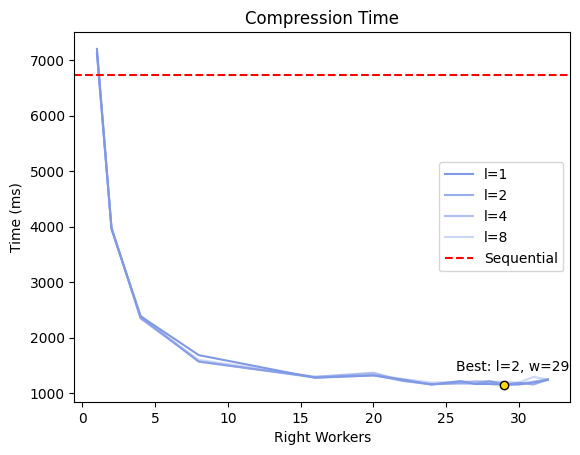

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define a base color (grey)
base_color = np.array([0.5, 0.6, 0.9])  # RGB for grey

# Function to adjust the opacity of the base color
def adjust_opacity(color, opacity):
    return np.append(color, opacity)

# Plotting the compression results
fig, ax = plt.subplots()

# Variables to track the best point
best_time = float('inf')
best_l = None
best_w = None

for i, (l, results) in enumerate(compression_results.items()):
    ws, times = zip(*results)
    opacity = 1 - (i * 0.2)  # Adjust opacity for each l
    color_with_opacity = adjust_opacity(base_color, opacity)
    ax.plot(ws, times, label=f"l={l}", color=color_with_opacity)
    
    # Find the best point
    min_time = min(times)
    if min_time < best_time:
        best_time = min_time
        best_l = l
        best_w = ws[times.index(min_time)]

# Highlight the best point
ax.scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
ax.annotate(f"Best: l={best_l}, w={best_w}", (best_w, best_time), textcoords="offset points", xytext=(6,10), ha='center')

ax.axhline(y=sequential_time_comp, color='r', linestyle='--', label='Sequential')

ax.set_xlabel("Right Workers")
ax.set_ylabel("Time (ms)")
ax.set_title("Compression Time")
ax.legend()
plt.show()

In [16]:
compression_results[1][0][1]

7203.15

In [29]:
compression_results[2]

[(1, 7134.700000000001),
 (2, 3979.2),
 (4, 2354.15),
 (8, 1568.0),
 (16, 1280.1999999999998),
 (20, 1321.95),
 (22, 1222.2),
 (24, 1161.4),
 (26, 1172.75),
 (27, 1170.55),
 (28, 1211.1),
 (29, 1147.4),
 (30, 1187.9499999999998),
 (31, 1154.55),
 (32, 1242.25)]

In [31]:
for results in compression_results[2]:
    print(results[1])

7134.700000000001
3979.2
2354.15
1568.0
1280.1999999999998
1321.95
1222.2
1161.4
1172.75
1170.55
1211.1
1147.4
1187.9499999999998
1154.55
1242.25


In [37]:
#calculate speedup, scalability and efficiency for compression_results. for the scalability consider l=1 and w=1 as the reference.

sequential_time_comp = 6725

speedup = []
scalability = []
efficiency = []

for results in compression_results[2]:
        speedup.append(sequential_time_comp / results[1])
        scalability.append(compression_results[1][0][1] / results[1])
        efficiency.append(sequential_time_comp / results[1] / results[0])

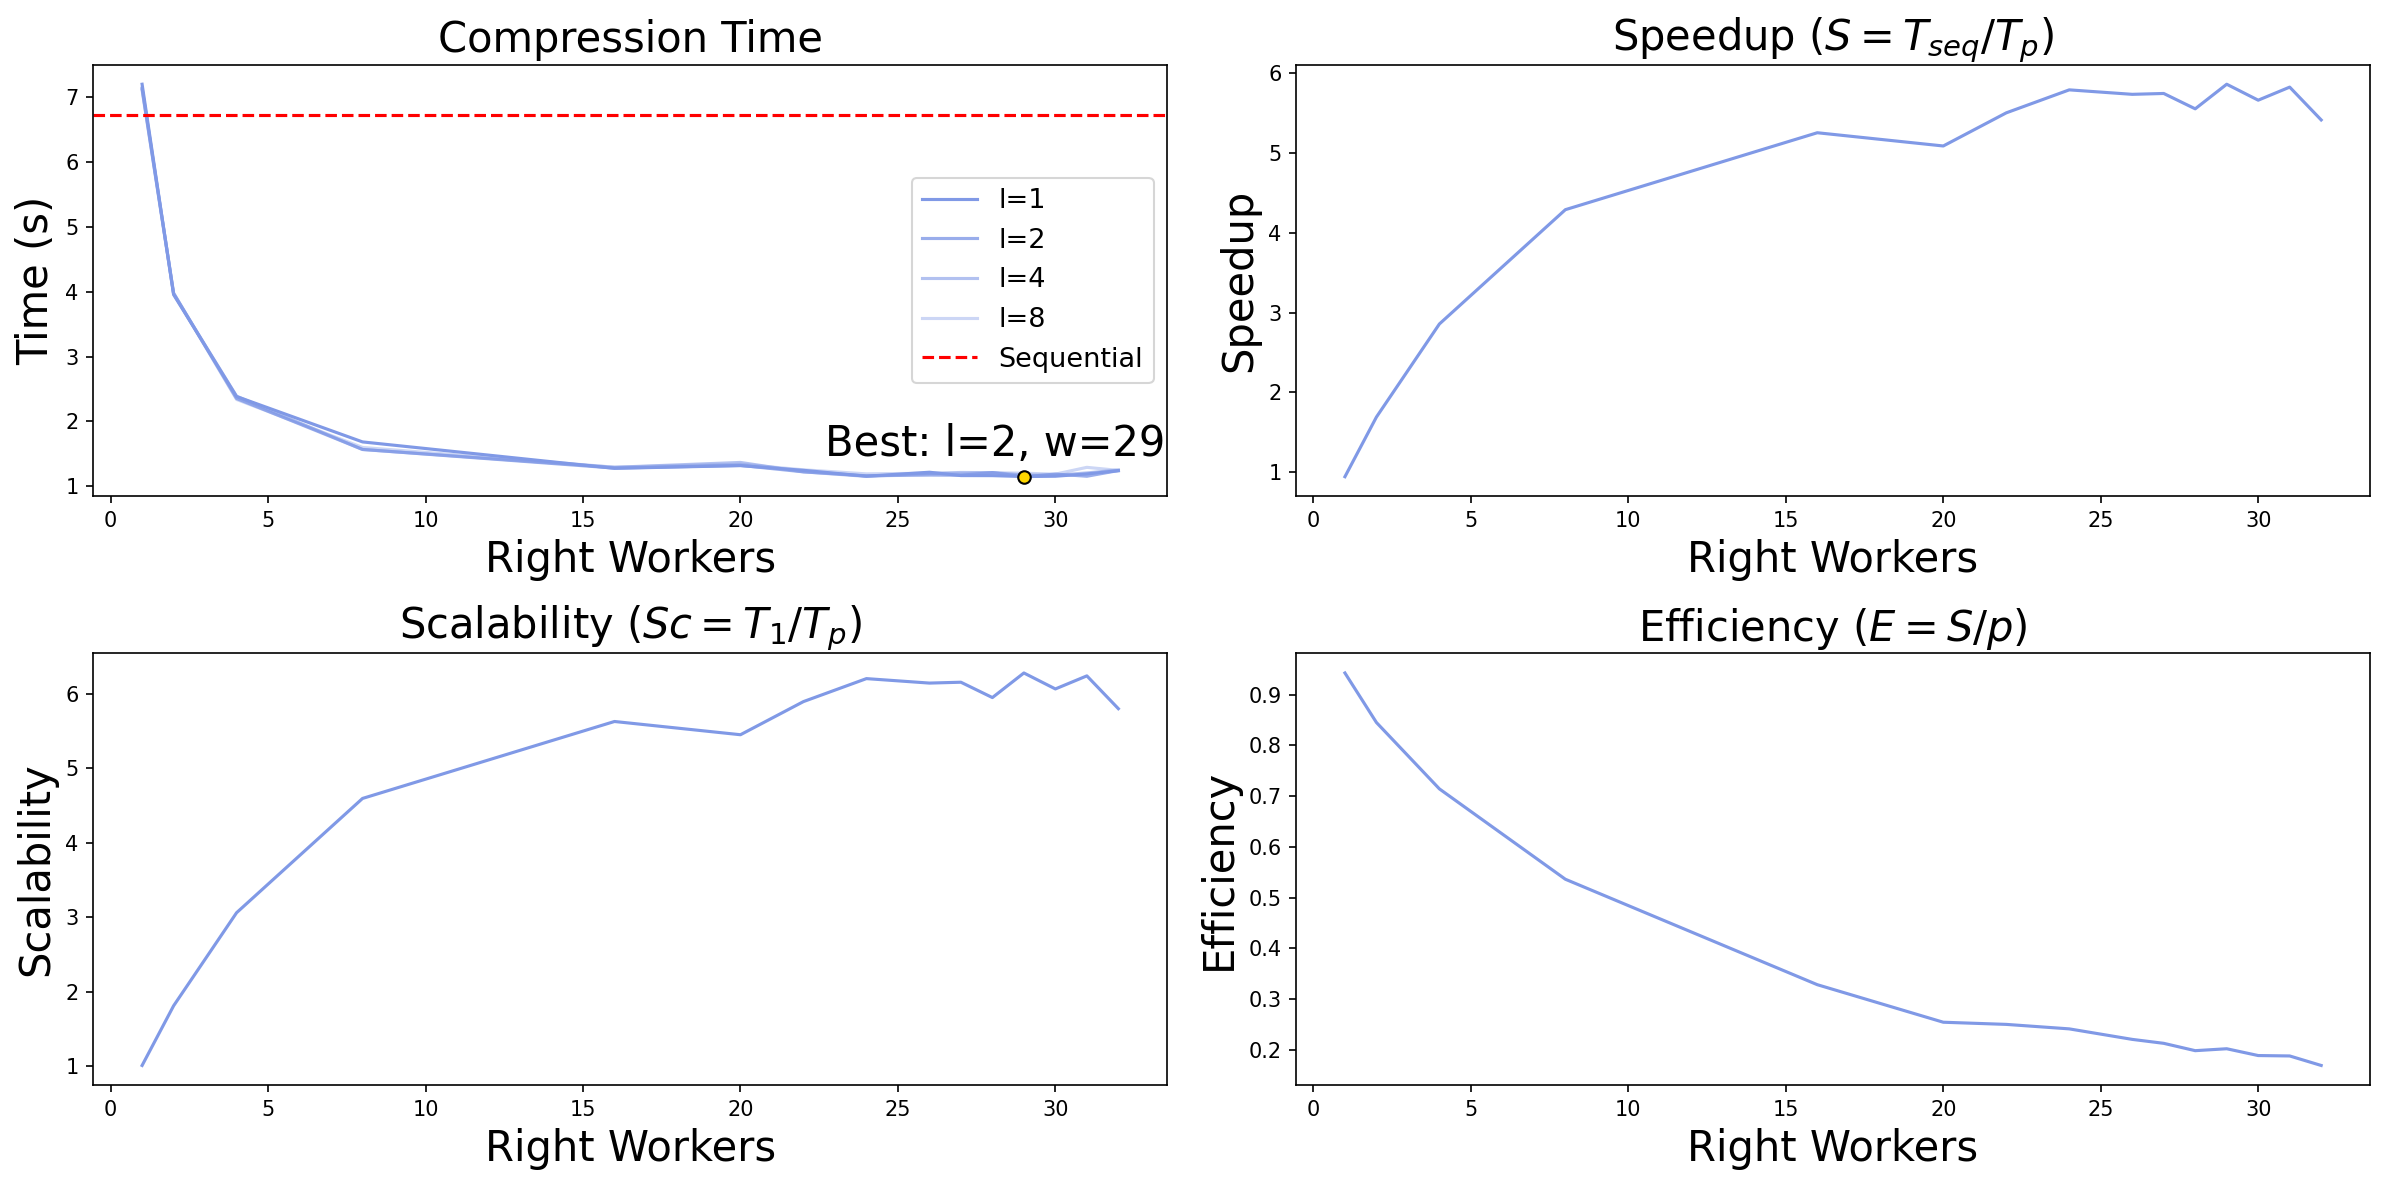

In [58]:
import matplotlib.pyplot as plt

# Assuming compression_results, speedup, scalability, efficiency, base_color, and adjust_opacity are defined

fig, axs = plt.subplots(2, 2, figsize=(16, 8), dpi=150)  # Adjusted figsize to make the plot more flat and rectangular

# Compression time plot
axs[0, 0].set_title("Compression Time", fontsize=20)
axs[0, 0].set_xlabel("Right Workers", fontsize=20)
axs[0, 0].set_ylabel("Time (s)", fontsize=20)  # Changed to seconds

best_time = float('inf')
best_l = None
best_w = None

for i, (l, results) in enumerate(compression_results.items()):
    ws, times = zip(*results)
    times_in_seconds = [t / 1000 for t in times]  # Convert milliseconds to seconds
    opacity = 1 - (i * 0.2)  # Adjust opacity for each l
    color_with_opacity = adjust_opacity(base_color, opacity)
    axs[0, 0].plot(ws, times_in_seconds, label=f"l={l}", color=color_with_opacity)
    
    # Find the best point
    min_time = min(times_in_seconds)
    if min_time < best_time:
        best_time = min_time
        best_l = l
        best_w = ws[times_in_seconds.index(min_time)]

# Highlight the best point
axs[0, 0].scatter(best_w, best_time, color='gold', edgecolor='black', zorder=5)
axs[0, 0].annotate(f"Best: l={best_l}, w={best_w}", (best_w, best_time), textcoords="offset points", xytext=(-14,10), ha='center', fontsize=20)

axs[0, 0].axhline(y=sequential_time_comp / 1000, color='r', linestyle='--', label='Sequential')  # Convert to seconds
axs[0, 0].legend(fontsize=13)

# Speedup plot
axs[0, 1].set_title("Speedup ($S = T_{seq} / T_p$)", fontsize=20)
axs[0, 1].set_xlabel("Right Workers", fontsize=20)
axs[0, 1].set_ylabel("Speedup", fontsize=20)

axs[0, 1].plot([results[0] for results in compression_results[2]], speedup, color=base_color)

# Scalability plot
axs[1, 0].set_title("Scalability ($Sc = T_1 / T_p$)", fontsize=20)
axs[1, 0].set_xlabel("Right Workers", fontsize=20)
axs[1, 0].set_ylabel("Scalability", fontsize=20)

axs[1, 0].plot([results[0] for results in compression_results[2]], scalability, color=base_color)

# Efficiency plot
axs[1, 1].set_title("Efficiency ($E = S / p$)", fontsize=20)
axs[1, 1].set_xlabel("Right Workers", fontsize=20)
axs[1, 1].set_ylabel("Efficiency", fontsize=20)

axs[1, 1].plot([results[0] for results in compression_results[2]], efficiency, color=base_color)

plt.tight_layout()
plt.show()

----
# weak scaling
